### Логические методы классификации

**Цель работы:** изучение принципов построения информационных систем с использованием логических методов классификации.

**Задачи:**
* освоение технологии внедрения алгоритмов на онове решающих списков в приложения;
* освоение технологии внедрения алгоритмов на онове решающих деревьев в приложения;
* изучение параметров логической классификации;
* освоение модификаций логических методов классификации.

### Классификация грибов

Мной был выбран набор данных под названием "Mushroom classification" по ссылке https://www.kaggle.com/datasets/uciml/mushroom-classification. Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам жаберных грибов семейства Agaricus и Lepiota, взятых из Полевого руководства Общества Одюбона по североамериканским грибам (1981). Каждый вид идентифицируется как определенно съедобный, определенно ядовитый или съедобный, но не рекомендованный. Этот последний класс был объединен с ядовитым. В результате анализа определено 20 компонентов:

1. ***class*** - класс (съедобный=e, ядовитый=p)
2. ***cap-shape*** - форма шляпки (колокол=b, коническая=c, выпуклая=x, плоская=f, с выступом=k, утопленная=s)
3. ***cap-surface*** - поверхность шляпки (волокнистая=f, бороздки=g, чешуйчатая=y, гладкая=s)
4. ***cap-color*** - цвет шляпки (коричневый=n, бафф=b, корица=c, серый=g, зеленый=r, розовый=p, фиолетовый=u, красный=e, белый=w, желтый=y)
5. ***bruises*** - вмятины (есть=t, нет=f)
6. ***odor*** - запах (миндаль=a, анис=l, креозот=c, рыбный=y, неприятный=f, затхлый=m, нет=n, острый=p, пряный=s)
7. ***gill-attachment*** - юбочка гриба (прикреплено = a, по убыванию = d, свободно = f, с надрезом = n)
8. ***gill-spacing*** - расстояние пластинок (близко=c, многолюдный=w, отдаленный=d)
9. ***gill-size*** - размер пластинок (широкий=b, узкий=n)
10. ***gill-color*** - цвет платинок (черный=k, коричневый=n, бафф=b, шоколад=h, серый=g, зеленый=r, оранжевый=o, розовый=p, фиолетовый=u, красный=e, белый=w, желтый=y)
11. ***stalk-surface-below-ring*** - поверхность стебля под кольцом (волокнистая=f, чешуйчатая=y, шелковистая=k, гладкая=s)
12. ***stalk-color-above-ring*** - цвет стебля над кольцом (коричневый = n, желтовато-коричневый = b, корица = c, серый = g, оранжевый = o, розовый = p, красный = e, белый = w, желтый = y)
13. ***stalk-color-below-ring*** - цвет стебля под кольцом (коричневый = n, желтовато-коричневый = b, корица = c, серый = g, оранжевый = o, розовый = p, красный = e, белый = w, желтый = y)
14. ***veil-type*** - тип вуали гриба (частичный=p, универсальный=u)
15. ***veil-color*** - цвет вуали гриба (коричневый=n,оранжевый=o,белый=w,желтый=y)
16. ***ring-number*** - число колец (none=n, one=o, two=t)
17. ***ring-type*** - тип колец (паутина=c, неуловимое=e, расширяющееся=f, большое=l, нет=n, подвеска=p, оболочка=s, зона=z)
18. ***spore-print-color*** - цвет отпечатка споры (черный=k, коричневый=n, бафф=b, шоколад=h, зеленый=r, оранжевый=o, фиолетовый=u, белый=w, желтый=y)
19. ***population*** - популяция (обильная=a, группированная=c, многочисленная=n, разбросанная=s, несколько=v, одиночная=y)
20. ***habitat*** - естественная среда (травы=g, листья=l, луга=m, тропинки=p, город=u, отходы=w, лес=d)


### Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data_path = "./mushrooms/mushrooms.csv"
data = pd.read_csv(data_path)
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


Модель DecisionTreeClassifier требует, чтобы все признаки были числовыми. Поэтому необходимо выполнить кодирование категориальных признаков в числовые значения. Один из способов сделать это - использовать метод кодирования, такой как one-hot encoding или label encoding. В данном случае используем **label encoding**.

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [4]:
X = data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']]
y = data['class']

#X = data[['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'population_s', 'population_v', 'population_y', 'habitat_d', 'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u', 'habitat_w']]
#y = data['class']

### Hold-out

Для построения дерева классификации воспользуемся специальным классом sklearn.tree.DecisionTreeClassifier. Оценими точность модели методом hold-out

Следует обратить внимание, что если в методе ближайших соседей производилась оптимизация по одному параметру K-количеству ближайших соседей, то при создании модели DecisionTreeClassifier необходимо указать два параметра: максимальную глубину дерева (max_depth) и количество признаков разделения дерева (max_features).

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Подмножества для hold-out
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=12)

# Обучение модели
tree = DecisionTreeClassifier(max_depth=5, 
                              random_state=21, 
                              max_features=2)
tree.fit(X_train, y_train)

# Получение оценки hold-out
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

0.9511894995898277


### Cross validation

Произведем оценку точности модели по методу cross validation, а также сделаем выводы об оптимальном значении параметра max_depth.

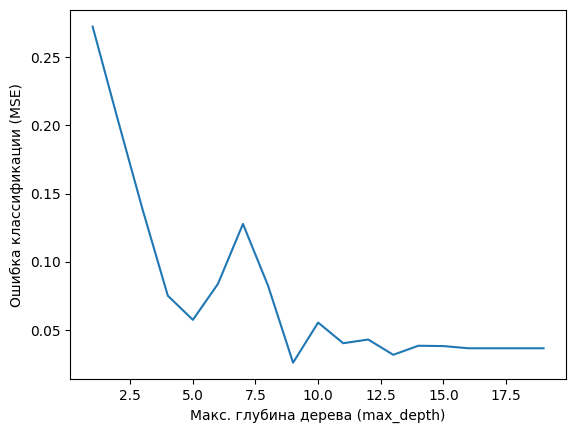

Оптимальные значения max_depth:  [9]


In [6]:
from sklearn.model_selection import cross_val_score

# Значения параметра max_depth
d_list = list(range(1,20))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d, 
                                  random_state=21, 
                                  max_features=2)
    scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
d_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения max_depth: ', all_d_min)

Оптимальное значение параметра max_depth модели получено, но в модели присутствует еще один параметр max_features, который был установлен в значение 2 (не изменялся и не оптимизировался). Для проведения cross validation по всем параметрам воспользуемся классом GridSearchCV пакета sklearn.model_selection.

In [7]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)

tree_params = { 'max_depth': range(1,20), 'max_features': range(1,4) }
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(X, y)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)


Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 9, 'max_features': 2}
Лучшие баллы cross validation:  0.9739058646744103


### Дерево решений

|--- stalk-surface-below-ring <= 1.50
|   |--- gill-spacing <= 0.50
|   |   |--- cap-color <= 5.00
|   |   |   |--- class: 1
|   |   |--- cap-color >  5.00
|   |   |   |--- bruises <= 0.50
|   |   |   |   |--- habitat <= 0.50
|   |   |   |   |   |--- ring-type <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- ring-type >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- habitat >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- bruises >  0.50
|   |   |   |   |--- class: 1
|   |--- gill-spacing >  0.50
|   |   |--- class: 0
|--- stalk-surface-below-ring >  1.50
|   |--- population <= 4.50
|   |   |--- cap-surface <= 0.50
|   |   |   |--- stalk-surface-below-ring <= 2.50
|   |   |   |   |--- bruises <= 0.50
|   |   |   |   |   |--- spore-print-color <= 5.00
|   |   |   |   |   |   |--- cap-color <= 4.50
|   |   |   |   |   |   |   |--- cap-color <= 3.50
|   |   |   |   |   |   |   |   |--- gill-color <= 8.00
|   |   |   |   |   |   |   |   |  

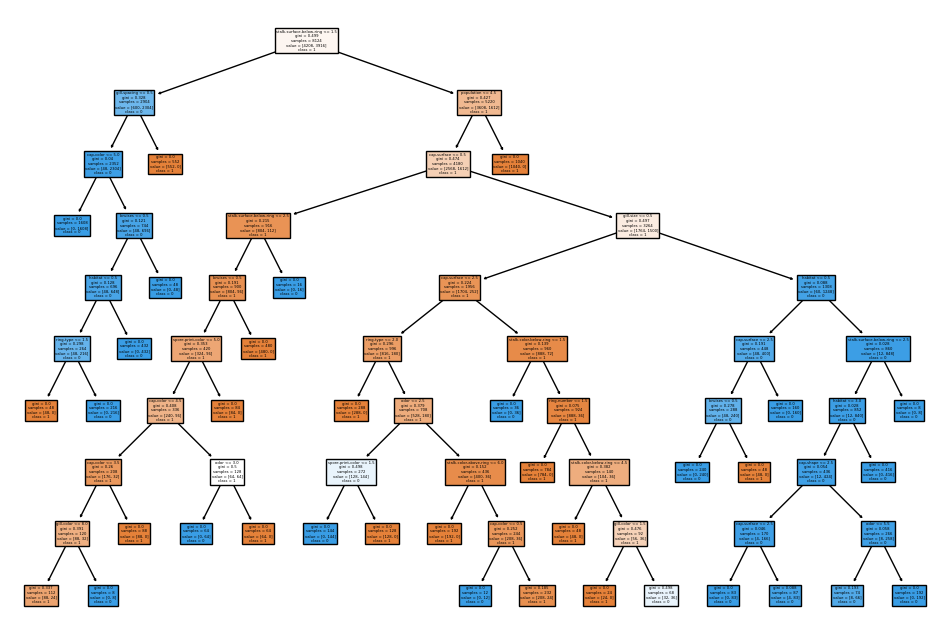

In [15]:
from sklearn.tree import export_text
from IPython.display import display
from sklearn.tree import plot_tree
# Генерируем текстовое представление дерева
tree_rules = export_text(tree_grid.best_estimator_, 
                         feature_names=list(X.columns))
print(tree_rules)
# Отобразите дерево решений в виде графика
plt.figure(figsize=(12, 8))
plot_tree(tree_grid.best_estimator_,
          filled=True,
          feature_names=list(X.columns),
          class_names=[str(x) for x in y.unique()])
plt.show()

C:\Users\Dns\AppData\Local\Temp\ipykernel_15644\2348889683.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
C:\Users\Dns\AppData\Local\Temp\ipykernel_15644\2348889683.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(fmin[j], fmax[j], plot_step))
C:\Users\Dns\AppData\Local\Temp\ipykernel_15644\2348889683.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

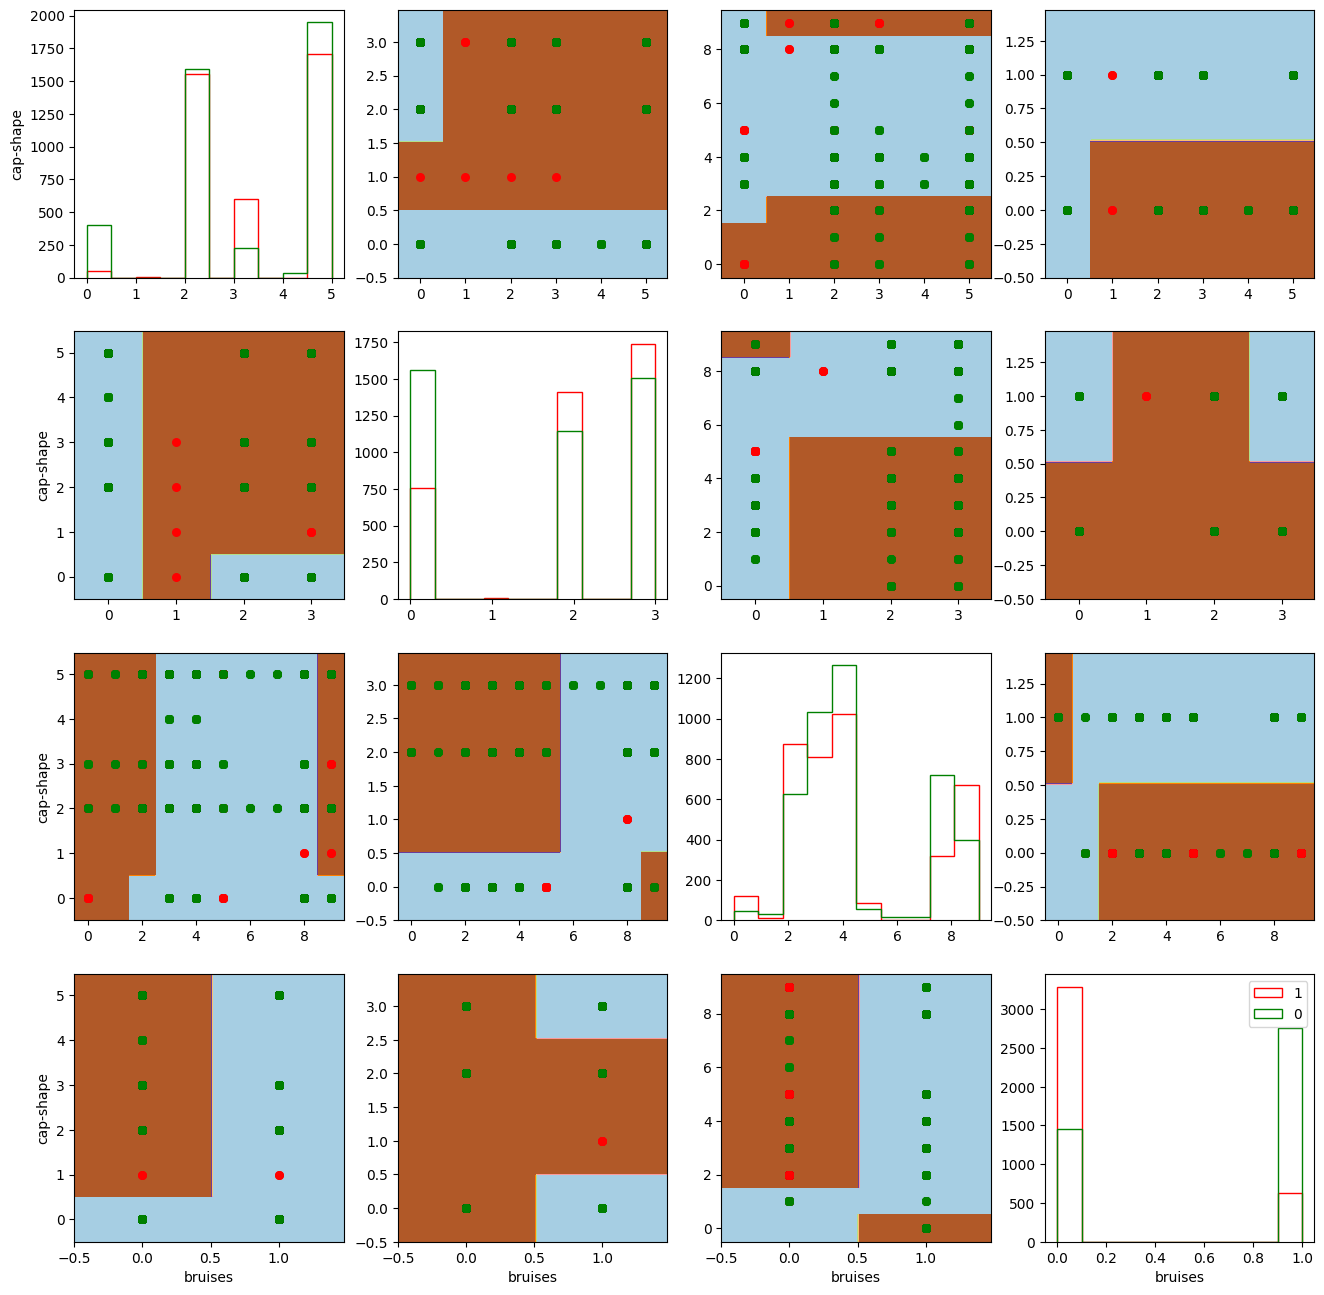

In [10]:
# Создаем подграфики для каждой пары признаков
plot_markers = ['r*', 'g^', 'bo']
answers = y.unique()

f, places = plt.subplots(4, 4, figsize=(16,16))

fmin = X.min() - 0.5
fmax = X.max() + 0.5
plot_step = 0.02


# Обходим все subplot
for i in range(0, 4):
    for j in range(0, 4):

        # Строим решающие границы
        if i != j:
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=2)
            model.fit(X.iloc[:, [i, j]].values, y)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)

            places[i, j].contourf(xx, yy, p, cmap='Paired')

        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(y == answers[id_answer])
            if i == j:
                places[i, j].hist(X.iloc[idx].iloc[:, i],
                                  color=plot_markers[id_answer][0],
                                  histtype='step')
            else:
                places[i, j].scatter(X.iloc[idx].iloc[:, i], X.iloc[idx].iloc[:, j],
                                  color=plot_markers[id_answer][0],
                                  label=answers[id_answer], s=30)

        if j == 0:
            places[i, j].set_ylabel(X.columns[j])

        if i == 3:
            places[i, j].set_xlabel(X.columns[i])

# Добавим легенду
plt.legend(answers, loc='best')

plt.show()


### Использование модели

In [12]:
# Построим модель для оптимального дерева
# max_features = 2, max_depth = 9

dtc = DecisionTreeClassifier(max_depth=9, 
                             random_state=21, 
                             max_features=2)
dtc.fit(X.values, y.values)


# Использование классификатора
# Объявление признаков объекта

cap_shape=float(input('Введите форму шляпки: '))
cap_surface=float(input('Введите поверхность шляпки: '))
cap_color=float(input('Введите цвет шляпки: '))
bruises=float(input('Есть ли вмятины на грибе: '))
odor=float(input('Запах гриба: '))
gill_attachment=float(input('Юбочка шляпки: '))
gill_spacing=float(input('Расстояние юбочки: '))
gill_size=float(input('Размер юбочки: '))
gill_color=float(input('Цвет юбочки: '))
stalk_surface_below_ring=float(input('Поверхность стебля под кольцом: '))
stalk_color_above_ring=float(input('Цвет стебля над кольцом: '))
stalk_color_below_ring=float(input('Цвет стебля под кольцом: '))
veil_type=float(input('Тип вуали гриба: '))
veil_color=float(input('Цвет вуали гриба: '))
ring_number=float(input('Число колец: '))
ring_type=float(input('Тип колец гриба: '))
spore_print_color=float(input('Цвет отпечатка споры: '))
population=float(input('Популяция: '))
habitat=float(input('Естественная среда: '))

X_new = np.array([[cap_shape, cap_surface, cap_color, bruises, odor, gill_attachment, gill_spacing, gill_size, gill_color, stalk_surface_below_ring, stalk_color_above_ring, stalk_color_below_ring, veil_type, veil_color, ring_number, ring_type, spore_print_color, population, habitat]])

# Получение ответа для нового объекта
target = dtc.predict(X_new)[0]

if target==1:
    target_str="ядовитый"
else:
    target_str="не ядовитый"


print('\nДанный гриб: ',target_str)



Введите форму шляпки: 5
Введите поверхность шляпки: 2
Введите цвет шляпки: 4
Есть ли вмятины на грибе: 1
Запах гриба: 6
Юбочка шляпки: 1
Расстояние юбочки: 0
Размер юбочки: 1
Цвет юбочки: 4
Поверхность стебля под кольцом: 2
Цвет стебля над кольцом: 7
Цвет стебля под кольцом: 7
Тип вуали гриба: 0
Цвет вуали гриба: 2
Число колец: 1
Тип колец гриба: 4
Цвет отпечатка споры: 2
Популяция: 3
Естественная среда: 5

Данный гриб:  ядовитый


### Контрольные вопросы

1. Поясните принцип построения дерева решений.
2. Укажите статистическое определение информативности.
3. Поясните энтропийное определение информативности.
4. Что такое многоклассовая информативность? Для чего она применяется?
5. Поясните назначение и алгоритм бинаризации количественных признаков.
6. Поясните порядок поиска закономерностей в форме конъюнкций.

**1. Принцип построения дерева решений:**

Дерево решений - это структура данных, которая представляет собой иерархическую модель, используемую для принятия решений. Построение дерева решений начинается с корневого узла, который представляет всю выборку данных. Затем выбирается признак, который наилучшим образом разделяет данные на два подмножества (или более) так, чтобы внутри каждого подмножества объекты были максимально однородны с точки зрения целевой переменной. Этот процесс повторяется рекурсивно для каждого подмножества до тех пор, пока не будут выполнены определенные условия остановки, такие как максимальная глубина дерева, минимальное количество объектов в листе или другие критерии.

**2. Статистическое определение информативности:**

Информативность в контексте деревьев решений обычно оценивается с использованием критериев информативности, таких как "прирост информации" или "критерий Джини". Эти критерии измеряют, насколько хорошо разбиение данных по конкретному признаку уменьшает неопределенность в данных. Например, критерий Джини измеряет вероятность того, что два случайно выбранных элемента из набора данных будут неправильно классифицированы, если они классифицированы в соответствии с распределением классов в узле. Чем ниже значение критерия, тем информативнее разбиение.

**3. Энтропийное определение информативности:**

Энтропия - это мера хаоса или неопределенности в системе. В контексте деревьев решений, энтропия используется как критерий информативности. Критерий информативности на основе энтропии измеряет неопределенность в узле. Если узел чист (все объекты в узле принадлежат одному классу), энтропия равна 0. Если объекты равномерно распределены по классам, энтропия максимальна. Разбиение, которое уменьшает энтропию, считается более информативным.

**4. Многоклассовая информативность:**

Многоклассовая информативность - это оценка информативности при решении задачи классификации с более чем двумя классами. Критерии информативности, такие как прирост информации и критерий Джини, могут быть обобщены для многоклассовой классификации. Они оценивают, насколько хорошо разбиение данных по конкретному признаку уменьшает неопределенность в отношении классов. Многоклассовая информативность помогает алгоритму дерева решений выбрать наилучшие разбиения, чтобы правильно классифицировать объекты во всех классах.

**5. Бинаризация количественных признаков:**

Бинаризация количественных признаков - это процесс преобразования числовых значений признака в бинарные (два значения) на основе порогового значения. Это позволяет дереву решений делать бинарные разделения на основе числовых признаков. Алгоритм бинаризации определяет, какой порог следует использовать для разделения признака. Объекты с значениями признака, меньшими или равными порогу, попадают в одно поддерево, а объекты с значениями выше порога - в другое. Это позволяет дереву решений обрабатывать числовые признаки в рамках своей структуры.

**6. Поиск закономерностей в форме конъюнкций:**

Порядок поиска закономерностей в форме конъюнкций, в контексте деревьев решений и правил ассоциации, включает в себя следующие шаги:

1. **Выбор набора данных:** Начните с выбора набора данных, в котором вы хотите найти закономерности. Это может быть набор данных о клиентах, продуктах, транзакциях или другой информации, в которой вы хотите найти правила или закономерности.

2. **Выбор признаков:** Определите, какие признаки вы хотите использовать для поиска закономерностей. Это могут быть любые характеристики из вашего набора данных, такие как возраст, пол, доход, продукты, ключевые слова и так далее.

3. **Определение цели:** Укажите, какую цель вы хотите достичь, найдя закономерности. Например, вы можете хотеть выяснить, какие факторы влияют на покупательские решения или какие товары чаще всего покупают вместе.

4. **Выбор метода поиска:** Выберите метод или алгоритм для поиска закономерностей. Например, для поиска в деревьях решений используется алгоритм построения дерева, а для поиска в правилах ассоциации может использоваться алгоритм Apriori.

5. **Определение критериев и ограничений:** Укажите критерии, которым должны соответствовать найденные закономерности. Например, вы можете задать минимальное количество наблюдений, которые должны подходить под закономерность, или минимальное значение поддержки для правил ассоциации.

6. **Поиск и оценка закономерностей:** Запустите выбранный метод поиска и оцените результаты. Это включает в себя нахождение правил или закономерностей и оценку их значимости на основе выбранных критериев.

7. **Интерпретация результатов:** Интерпретируйте найденные закономерности. Попробуйте понять, какие факторы влияют на результаты, и как можно использовать эти закономерности для принятия решений или улучшения бизнес-процессов.

8. **Использование результатов:** В зависимости от цели поиска закономерностей, примените их результаты. Это может включать в себя оптимизацию бизнес-процессов, создание рекомендательных систем, принятие маркетинговых решений и так далее.

9. **Мониторинг и обновление:** После использования найденных закономерностей, важно следить за изменениями в данных и обновлять закономерности, чтобы они оставались актуальными и полезными.

Этот процесс может применяться в различных областях, включая маркетинг, медицину, финансы, исследования и другие, для поиска важных закономерностей и шаблонов в данных.